In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
sample = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-beginner-challenge/SampleSubmission.csv")
test = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-beginner-challenge/test.csv")
train = pd.read_csv("C:/Users/user/datasets/umojahack-africa-2022-beginner-challenge/train.csv")

In [3]:
sample.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,0


In [4]:
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [5]:
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


# Data Wrangling

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 297177 non-null  object 
 1   Datetime           297177 non-null  object 
 2   Sensor1_PM2.5      293563 non-null  float64
 3   Sensor2_PM2.5      293563 non-null  float64
 4   Temperature        293628 non-null  float64
 5   Relative_Humidity  293628 non-null  float64
 6   Offset_fault       297177 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.9+ MB


* A lot of "dirty data"

In [7]:
train.shape

(297177, 7)

In [8]:
num_cols = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity"]
train[num_cols + ["Offset_fault"]].describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [9]:
train.isnull().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [10]:
# We will impute the missing values
# For all features there seems to be a sort of corr hence we will use the same method to fill in values
train["Sensor1_PM2.5"] = train["Sensor1_PM2.5"].fillna(train["Sensor1_PM2.5"].mean())
train["Sensor2_PM2.5"] = train["Sensor2_PM2.5"].fillna(train["Sensor2_PM2.5"].mean())
train["Temperature"] = train["Temperature"].fillna(train.Temperature.median())
train["Relative_Humidity"] = train["Relative_Humidity"].fillna(train.Relative_Humidity.median())

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 127361 non-null  object 
 1   Datetime           127361 non-null  object 
 2   Sensor1_PM2.5      127361 non-null  float64
 3   Sensor2_PM2.5      127361 non-null  float64
 4   Temperature        39271 non-null   float64
 5   Relative_Humidity  39271 non-null   float64
dtypes: float64(4), object(2)
memory usage: 5.8+ MB


In [12]:
test["Temperature"] = test["Temperature"].fillna(test.Temperature.median())
test["Relative_Humidity"] = test["Relative_Humidity"].fillna(test.Relative_Humidity.median())

In [13]:
num_cols = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity"]
train[num_cols + ["Offset_fault"]].describe().T.style.background_gradient(cmap="magma")

,count,mean,std,min,25%,50%,75%,max
Sensor1_PM2.5,297177.000000,40.751195,28.352196,-9.450000,22.650000,36.770000,49.220000,997.960000
Sensor2_PM2.5,297177.000000,38.183018,28.473034,-9.700000,19.700000,34.020000,47.380000,997.260000
Temperature,297177.000000,23.299637,3.817094,16.700000,20.400000,21.900000,26.300000,34.900000
Relative_Humidity,297177.000000,78.717471,14.695729,27.000000,68.000000,84.000000,91.000000,99.000000
Offset_fault,297177.000000,0.371072,0.483092,0.000000,0.000000,0.000000,1.000000,1.000000


# Feature Engineering

In [14]:
train["Datetime"] = pd.to_datetime(train["Datetime"])

# Extract day, month year and hour from the Datetime column
# day
train['day'] = train.Datetime.dt.day

# month
train['month'] = train.Datetime.dt.month
 
# year
train['year'] = train.Datetime.dt.year

# hour
train['hour'] = train.Datetime.dt.hour

# Preview engineered date features
train[['Datetime', 'hour', 'day', 'month', 'year']].head()

,Datetime,hour,day,month,year
0,2021-11-03 04:06:31,4,3,11,2021
1,2021-11-08 18:43:23,18,8,11,2021
2,2021-11-07 09:50:33,9,7,11,2021
3,2022-01-01 18:55:15,18,1,1,2022
4,2021-11-05 22:23:48,22,5,11,2021


In [15]:
# We might as well introduce a new feature based on the sensors
train["avg_sensor"] = (train["Sensor1_PM2.5"] + train["Sensor2_PM2.5"])/2
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,month,year,hour,avg_sensor
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0,3,11,2021,4,51.050
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,8,11,2021,18,34.325
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,7,11,2021,9,21.340
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,1,1,2022,18,17.440
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,5,11,2021,22,36.535


In [16]:
test["Datetime"] = pd.to_datetime(test["Datetime"])

# Extract day, month year and hour from the Datetime column
# day
test['day'] = test.Datetime.dt.day

# month
test['month'] = test.Datetime.dt.month
 
# year
test['year'] = test.Datetime.dt.year

# hour
test['hour'] = test.Datetime.dt.hour

# Preview engineered date features
test[['Datetime', 'hour', 'day', 'month', 'year']].head()


,Datetime,hour,day,month,year
0,2022-01-28 08:49:41,8,28,1,2022
1,2022-02-16 21:30:17,21,16,2,2022
2,2022-01-24 17:57:18,17,24,1,2022
3,2022-01-31 07:07:09,7,31,1,2022
4,2022-01-31 00:37:05,0,31,1,2022


In [17]:
test["avg_sensor"] = (test["Sensor1_PM2.5"] + test["Sensor2_PM2.5"])/2
test.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,day,month,year,hour,avg_sensor
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0,28,1,2022,8,102.765
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,22.5,78.0,16,2,2022,21,54.105
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0,24,1,2022,17,367.040
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0,31,1,2022,7,73.510
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0,31,1,2022,0,61.150


# Outliers

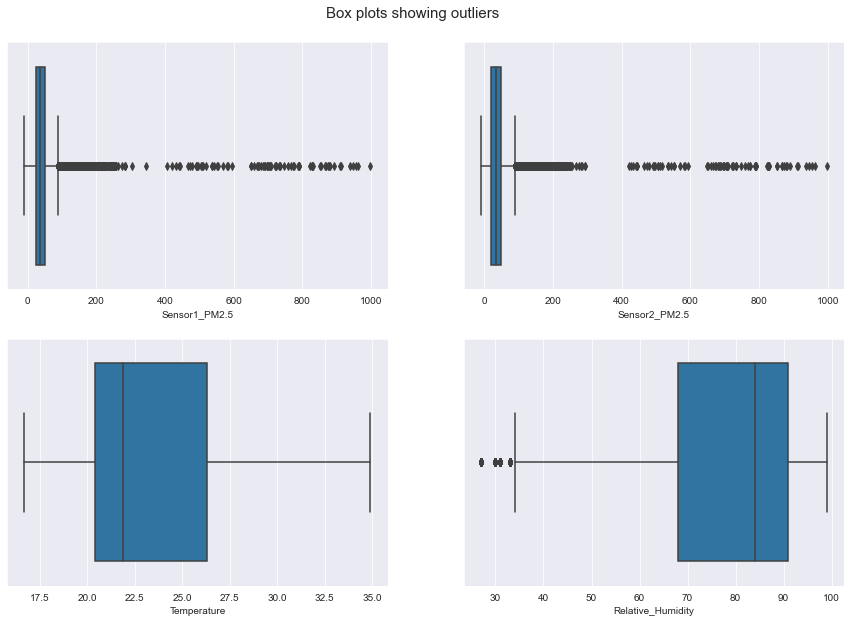

In [18]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, ['Sensor1_PM2.5','Sensor2_PM2.5', 'Temperature','Relative_Humidity']):
  sns.boxplot(train[name], ax = ax)

* All have outliers except for `Temperature`

### Outlier treatment

In [19]:
train["Sensor1_PM2.5"].describe()

count    297177.000000
mean         40.751195
std          28.352196
min          -9.450000
25%          22.650000
50%          36.770000
75%          49.220000
max         997.960000
Name: Sensor1_PM2.5, dtype: float64

In [20]:
train["Sensor2_PM2.5"].describe()

count    297177.000000
mean         38.183018
std          28.473034
min          -9.700000
25%          19.700000
50%          34.020000
75%          47.380000
max         997.260000
Name: Sensor2_PM2.5, dtype: float64

In [21]:
# We will use Quantile Flooring and Capping
print(train["Sensor1_PM2.5"].quantile(0.10))
print(train["Sensor1_PM2.5"].quantile(0.90))

12.97
73.53


In [22]:
train["Sensor1_PM2.5"] = np.where(train["Sensor1_PM2.5"]<12.97, 12.97, train["Sensor1_PM2.5"])
train["Sensor1_PM2.5"] = np.where(train["Sensor1_PM2.5"]>73.53, 73.53, train["Sensor1_PM2.5"])
# calculate the skewness
print(train["Sensor1_PM2.5"].skew())

0.44834537170505306


In [23]:
# Dropping the outlier data points
index = train[(train['Sensor1_PM2.5'] >= 997.260000)|(train['Sensor1_PM2.5'] <= -9.450000)].index
train.drop(index, inplace=True)
train['Sensor1_PM2.5'].describe()

count    297177.000000
mean         38.250947
std          18.643300
min          12.970000
25%          22.650000
50%          36.770000
75%          49.220000
max          73.530000
Name: Sensor1_PM2.5, dtype: float64

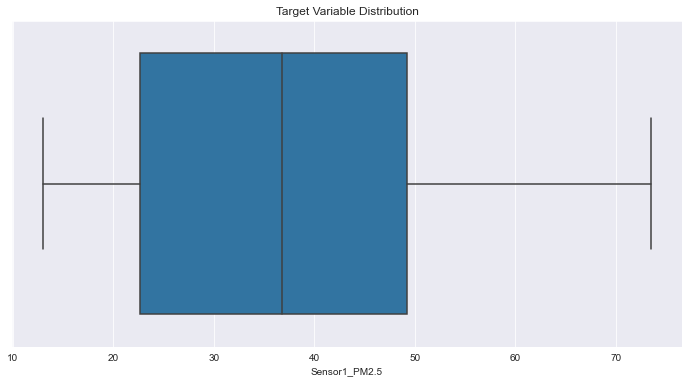

In [24]:
# Now let us look at our data after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(train["Sensor1_PM2.5"])
plt.title('Target Variable Distribution');

* Voila!!!!!!


* Now repeat for the rest

In [25]:
print(train["Sensor2_PM2.5"].quantile(0.10))
print(train["Sensor2_PM2.5"].quantile(0.90))

10.92
68.88800000000046


In [26]:
train["Sensor2_PM2.5"] = np.where(train["Sensor2_PM2.5"]<10.92, 10.92, train["Sensor2_PM2.5"])
train["Sensor2_PM2.5"] = np.where(train["Sensor2_PM2.5"]>68.88800000000046, 68.88800000000046, train["Sensor2_PM2.5"])
# calculate the skewness
print(train["Sensor2_PM2.5"].skew())

0.3883485282785917


In [27]:
# Dropping the outlier data points
index = train[(train['Sensor2_PM2.5'] >= 997.260000)|(train['Sensor2_PM2.5'] <= -9.700000)].index
train.drop(index, inplace=True)
train['Sensor2_PM2.5'].describe()

count    297177.000000
mean         35.432869
std          18.089238
min          10.920000
25%          19.700000
50%          34.020000
75%          47.380000
max          68.888000
Name: Sensor2_PM2.5, dtype: float64

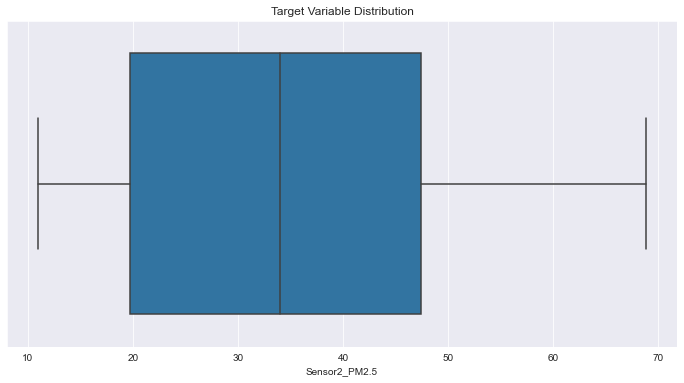

In [28]:
# Now let us look at our data after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(train["Sensor2_PM2.5"])
plt.title('Target Variable Distribution');

In [29]:
print(train.Relative_Humidity.quantile(0.10))
print(train.Relative_Humidity.quantile(0.90))

56.0
94.0


In [30]:
train.Relative_Humidity = np.where(train.Relative_Humidity<=56.0, 56.0, train.Relative_Humidity)
train.Relative_Humidity = np.where(train.Relative_Humidity>=94.0, 94.0, train.Relative_Humidity)

#Skewness
print(train.Relative_Humidity.skew())

-0.5659511644840676


In [31]:
train.Relative_Humidity.describe()

count    297177.000000
mean         79.198165
std          13.079481
min          56.000000
25%          68.000000
50%          84.000000
75%          91.000000
max          94.000000
Name: Relative_Humidity, dtype: float64

In [32]:
# Dropping the outlier data points
index = train[(train['Relative_Humidity'] >= 94.000000)|(train['Relative_Humidity'] <= 56.000000)].index
train.drop(index, inplace=True)
train['Relative_Humidity'].describe()

count    229745.000000
mean         79.862870
std          10.699414
min          57.000000
25%          71.000000
50%          83.000000
75%          89.000000
max          93.000000
Name: Relative_Humidity, dtype: float64

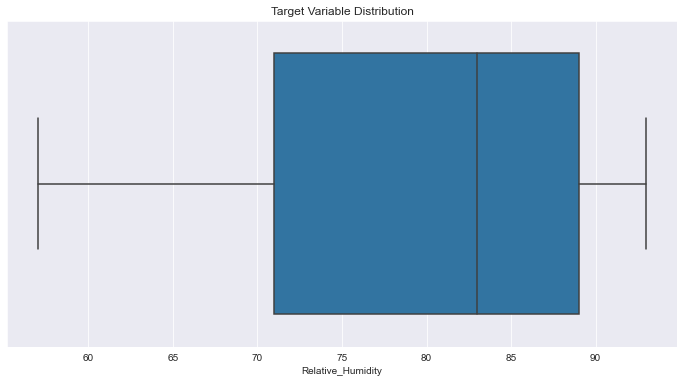

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(train["Relative_Humidity"])
plt.title('Target Variable Distribution');

# Exploratory Data Analysis

In [34]:
corr = train[num_cols + ["Offset_fault"]].corr()
corr

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
Sensor1_PM2.5,1.000000,0.961224,-0.468318,0.399798,-0.185400
Sensor2_PM2.5,0.961224,1.000000,-0.438927,0.372242,-0.358182
Temperature,-0.468318,-0.438927,1.000000,-0.887441,0.002750
Relative_Humidity,0.399798,0.372242,-0.887441,1.000000,-0.003567
Offset_fault,-0.185400,-0.358182,0.002750,-0.003567,1.000000


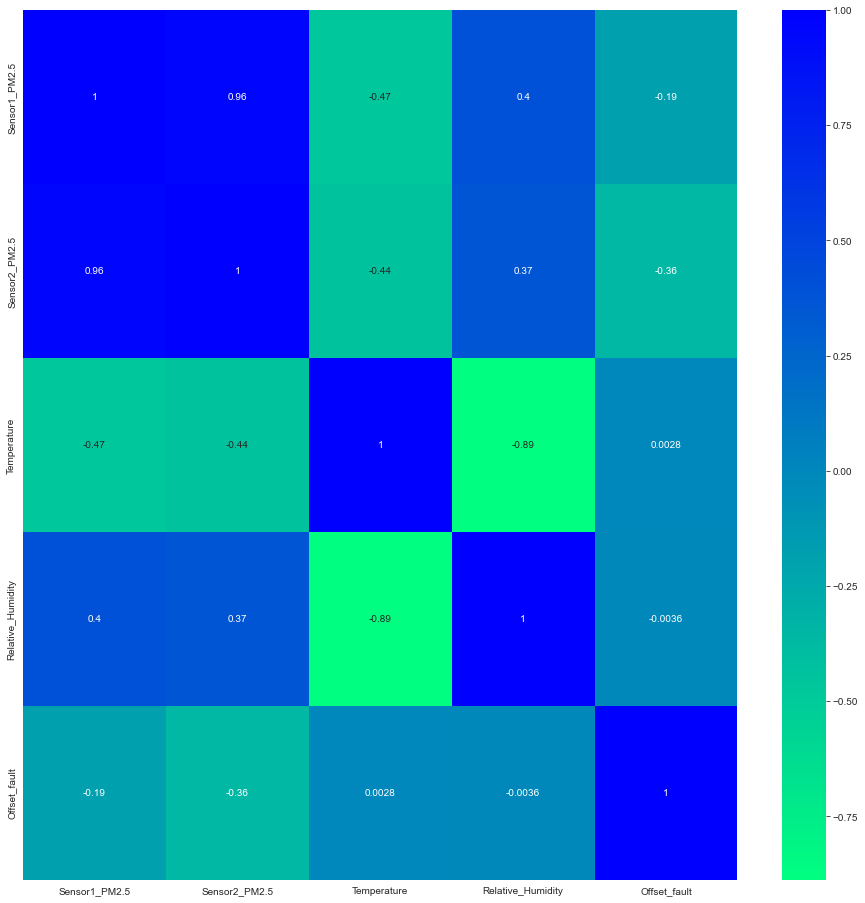

In [35]:
plt.figure(figsize =(16,16))
sns.heatmap(corr, annot = True, cmap ="winter_r");

<Figure size 1152x648 with 0 Axes>

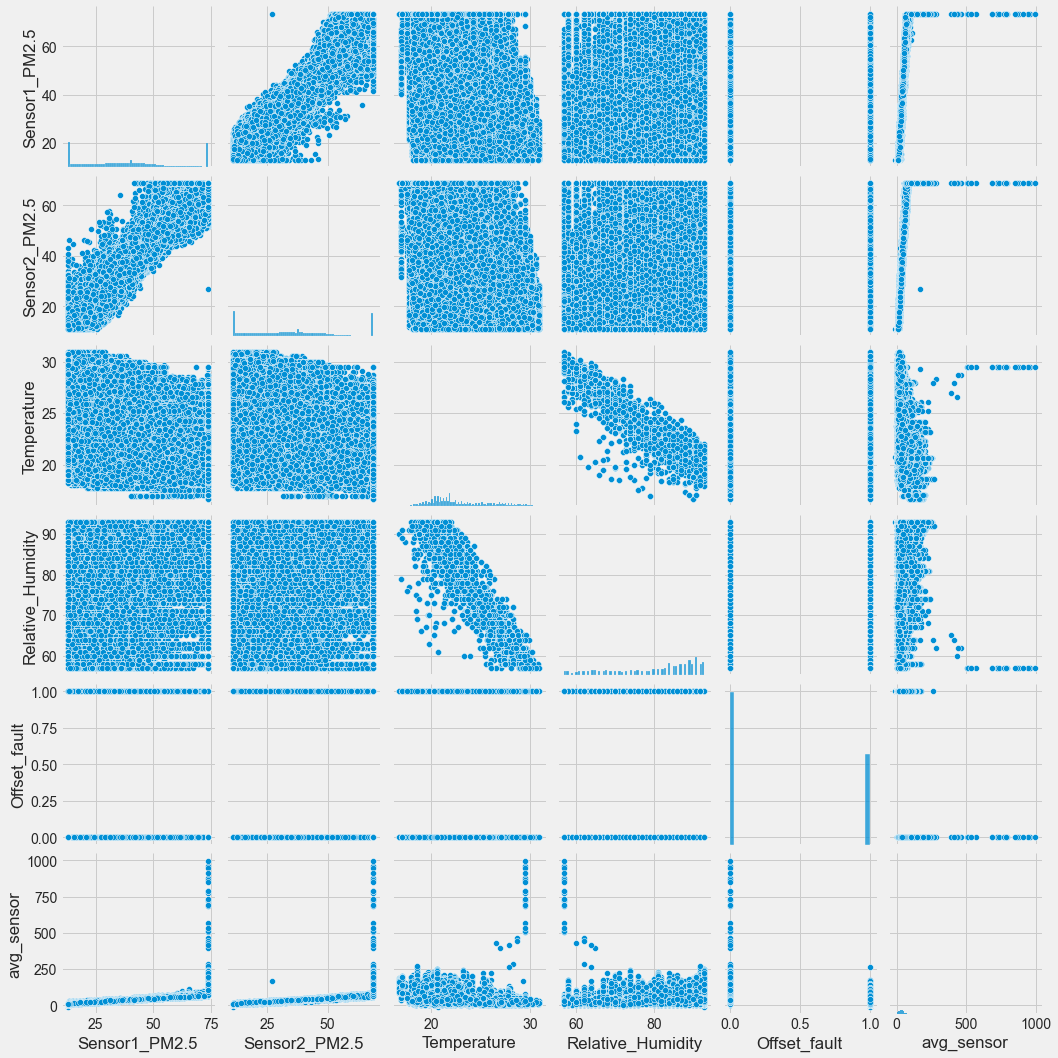

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (16,9))
sns.pairplot(train[num_cols + ["Offset_fault"] + ["avg_sensor"]]);

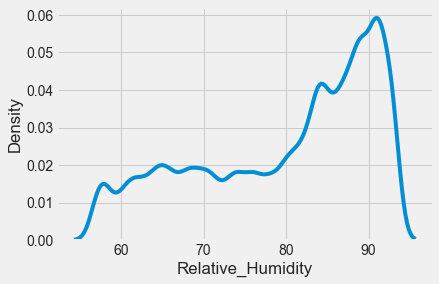

In [37]:
sns.kdeplot(train.Relative_Humidity);

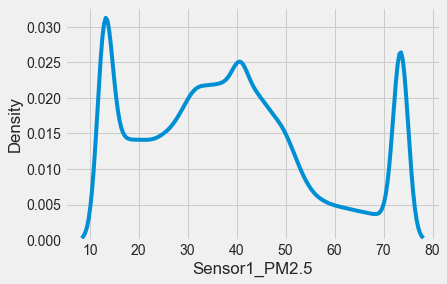

In [38]:
sns.kdeplot(train["Sensor1_PM2.5"]);

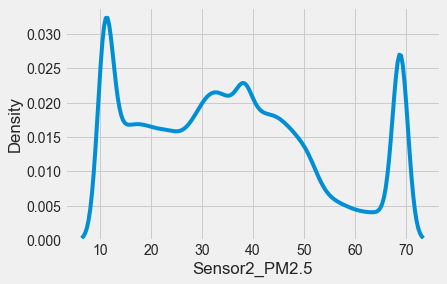

In [39]:
sns.kdeplot(train["Sensor2_PM2.5"]);

* Notice how density of the sensors are almost identical

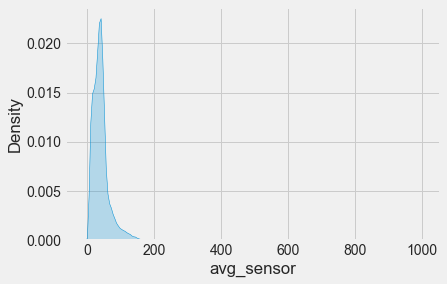

In [40]:
sns.kdeplot(train["avg_sensor"], shade = True);

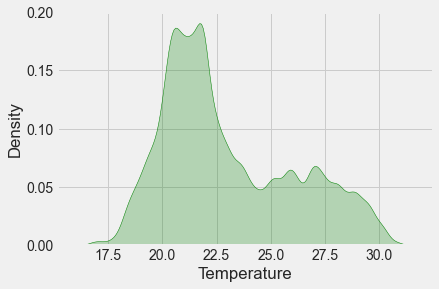

In [41]:
sns.kdeplot(train["Temperature"], color= "g", shade = True);

In [42]:
train.tail()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,month,year,hour,avg_sensor
297170,ID_7J3OP61YX5L3,2022-01-01 16:55:22,22.73,17.630,27.1,66.0,1,1,1,2022,16,20.180
297171,ID_H7XJC3KY29XJ,2021-12-03 09:21:12,31.35,38.680,22.8,87.0,0,3,12,2021,9,35.015
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.770,28.6,62.0,0,19,11,2021,12,37.085
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.630,21.6,86.0,1,22,11,2021,1,45.375
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,73.53,68.888,20.6,93.0,0,23,11,2021,22,105.560


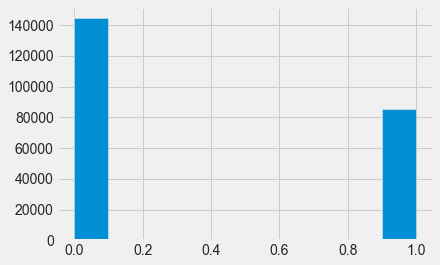

In [43]:
plt.hist(train.Offset_fault);

Text(0.5, 1.0, 'Year vs Temperature')

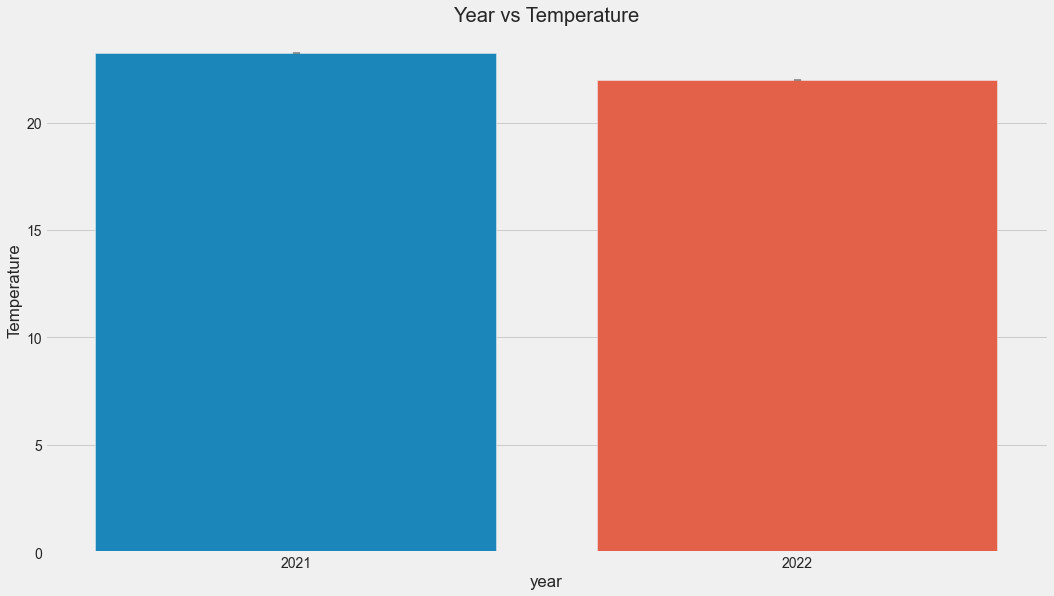

In [44]:
plt.figure(figsize=(16,9))
sns.barplot(x = "year", y = "Temperature", data = train)
plt.title("Year vs Temperature")

* So only two years

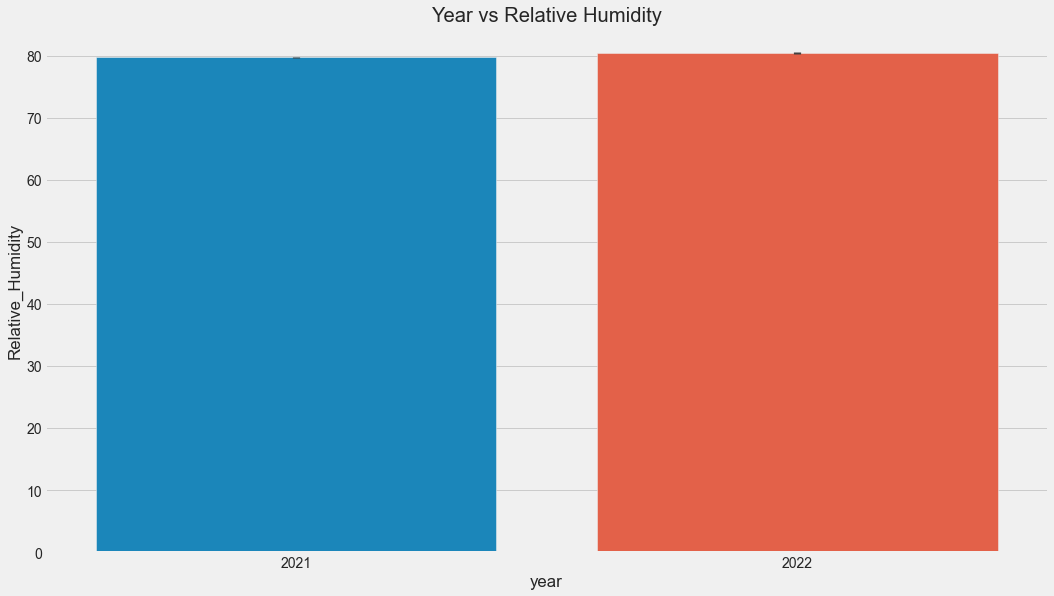

In [45]:
plt.figure(figsize=(16,9))
sns.barplot(x = "year", y = "Relative_Humidity", data = train)
plt.title("Year vs Relative Humidity");

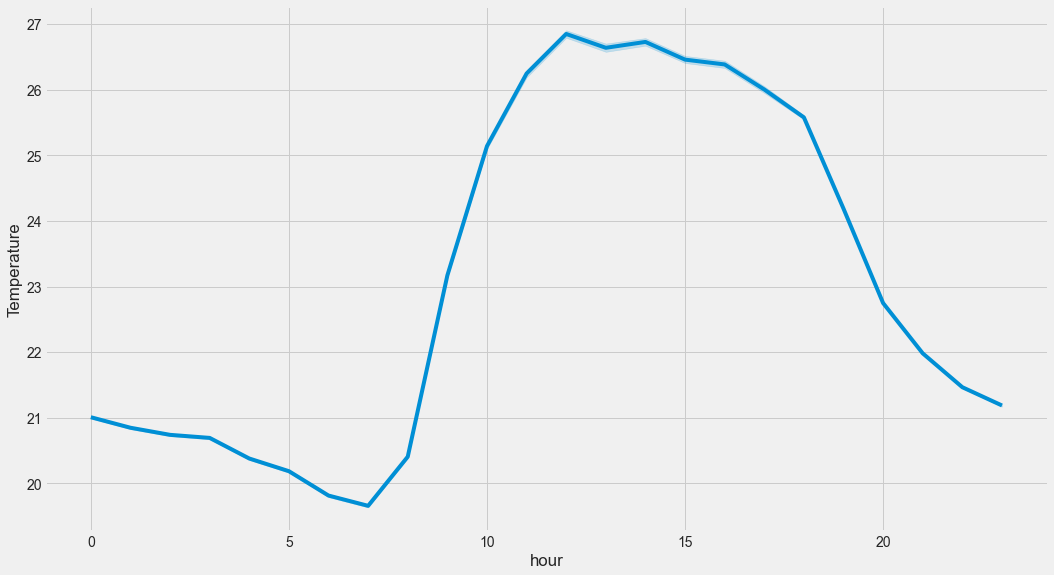

In [46]:
f, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x="hour", y="Temperature", data=train);

* It is hottest around three o'clock

In [47]:
# Since 2021 is the hottest
train21 = train.loc[train.year == 2021]
train21

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,month,year,hour,avg_sensor
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.400,25.0,75.0,0,8,11,2021,18,34.325
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.500,24.9,75.0,0,7,11,2021,9,21.340
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.770,20.9,89.0,0,5,11,2021,22,36.535
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.620,20.6,86.0,1,18,12,2021,2,39.120
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.250,19.3,92.0,1,19,12,2021,6,16.235
...,...,...,...,...,...,...,...,...,...,...,...,...
297169,ID_64FXZ9KZ803E,2021-11-11 18:44:58,35.48,34.780,27.1,63.0,0,11,11,2021,18,35.130
297171,ID_H7XJC3KY29XJ,2021-12-03 09:21:12,31.35,38.680,22.8,87.0,0,3,12,2021,9,35.015
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.770,28.6,62.0,0,19,11,2021,12,37.085
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.630,21.6,86.0,1,22,11,2021,1,45.375


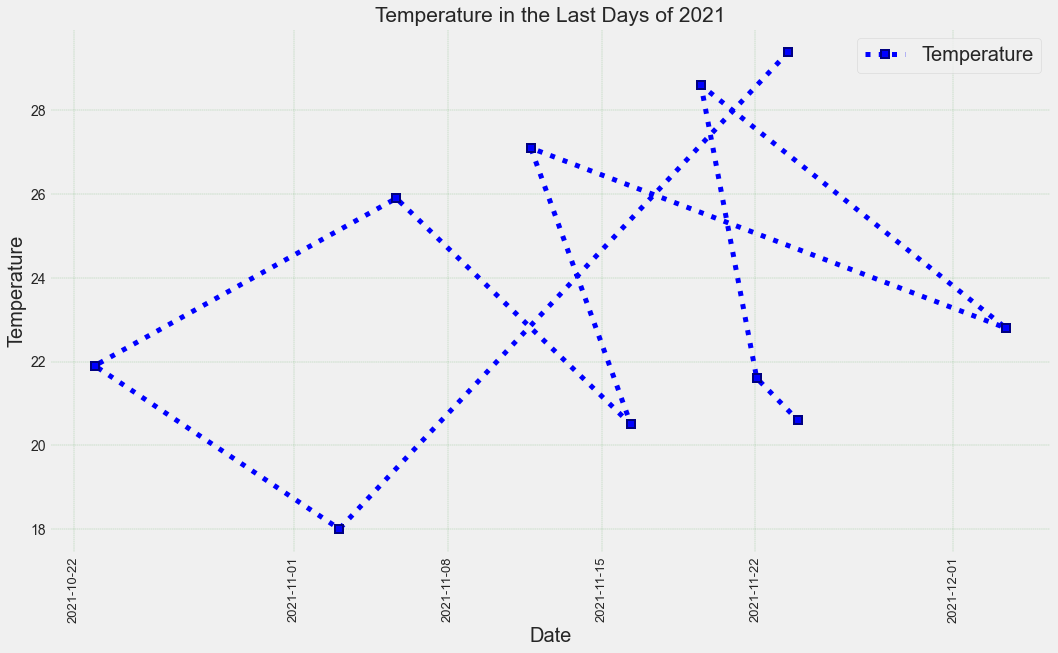

In [48]:
last_10_train21 = train21.tail(10)
plt.figure(figsize=(16,9))
plt.plot(last_10_train21.Datetime, last_10_train21.Temperature, marker="s", c="b", ls=":", lw=5, ms=8, mew=2, mec="navy")
plt.grid(alpha=.4, lw=.4, ls="--", c="g")
plt.title("Temperature in the Last Days of 2021", fontsize=21)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Temperature", fontsize=20)
plt.tick_params(axis="x", which="major", labelsize=13, rotation=90)
plt.legend(["Temperature"], fontsize=20)

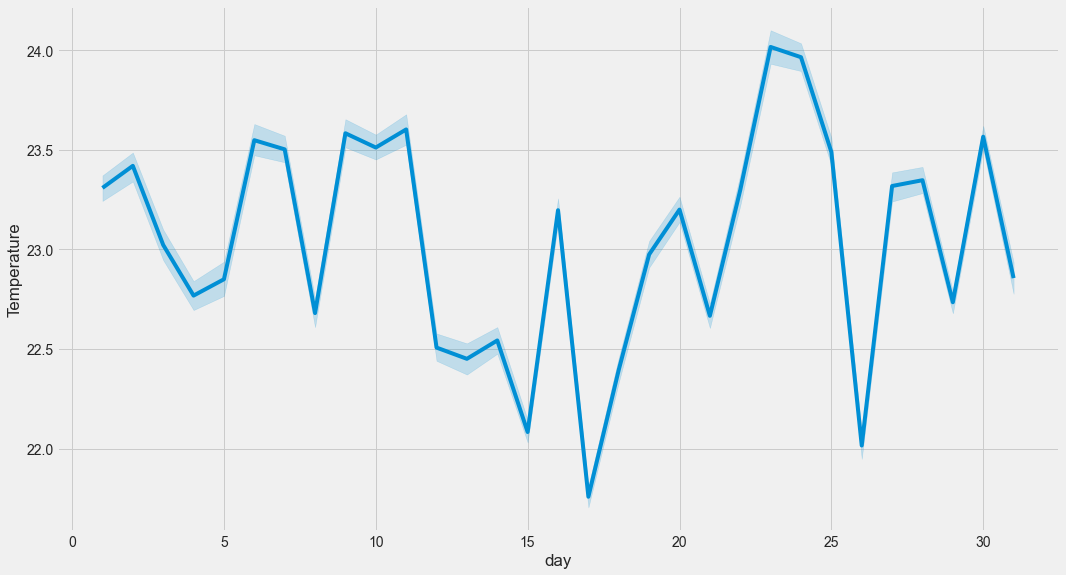

In [49]:
f, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x="day", y="Temperature", data=train);

* Around end month is the hottest

# Modelling

In [50]:
train.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,day,month,year,hour,avg_sensor
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,8,11,2021,18,34.325
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,7,11,2021,9,21.340
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,1,1,2022,18,17.440
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,5,11,2021,22,36.535
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1,13,1,2022,9,23.250


In [51]:
# Selecting the independent variables and the target variable
train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'day',\
               	'year', 'month', 'hour', 'avg_sensor']

X = train[train_feats].fillna(0)
y = train.Offset_fault


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     43373
           1       0.84      0.82      0.83     25551

    accuracy                           0.88     68924
   macro avg       0.87      0.86      0.87     68924
weighted avg       0.88      0.88      0.88     68924

Accuracy: 0.8757036736115141
Auc: 0.87


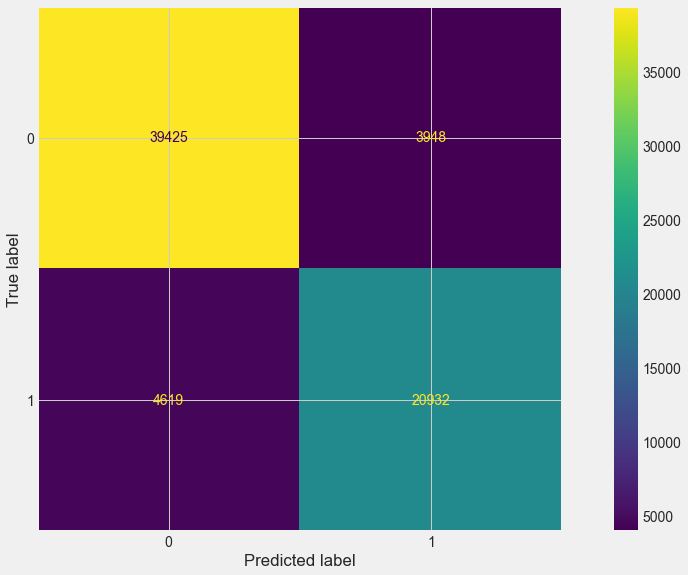

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(16,9))
disp.plot(ax=ax)
plt.show()

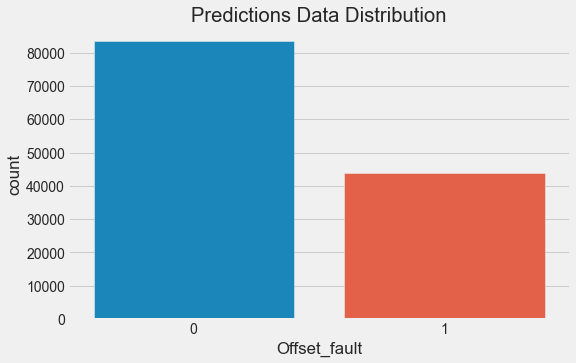

In [59]:
# Make prediction on the test set
test_df = test[train_feats]
predictions = model.predict(test_df)

# # Create a submission file
sub_file = sample.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [60]:
# Preview the sub_file
sub_file.head()

,ID,Offset_fault
0,ID_STL3V9B2OU12,0
1,ID_U2EKAY4SGA94,0
2,ID_UJFLEWQR0U4N,0
3,ID_S2C2GPGA4R5I,0
4,ID_5V2C2ZL221H8,1


In [61]:
# Instantiating the model
clf = RandomForestClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
print(f"Auc: {round(roc_auc_score(y_pred, y_test), 2)}")

Accuracy score: 0.7582409610585572


              precision    recall  f1-score   support

           0       0.77      0.88      0.82     43373
           1       0.73      0.55      0.63     25551

    accuracy                           0.76     68924
   macro avg       0.75      0.72      0.73     68924
weighted avg       0.75      0.76      0.75     68924

Auc: 0.75


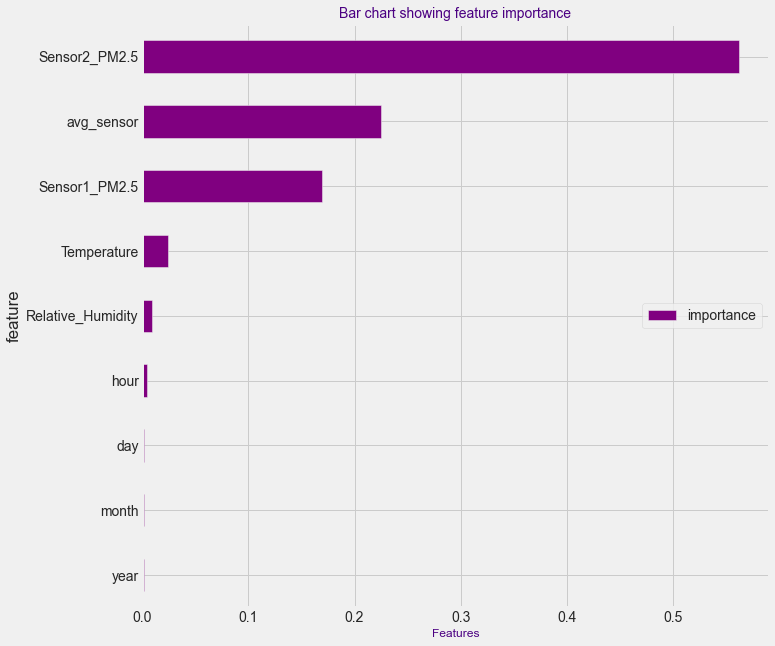

In [62]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()